### Gradient decent algorithn (using Linear Regression)

Plot a graph for :
1. Moment of delta (RSS)
2. Moment of weight

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import statsmodels.api as stm
import scipy.stats as stats
import sklearn
import seaborn as sns

#### Importing the dataset

In [ ]:
cars = pd.read_csv("mtcars.csv")

#### Define variable x and y from the dataset

In [4]:
cars_x = cars[['wt']]
cars_x.head()
x = stm.add_constant(cars_x)    # to add variable of constant ones for calculation purpose
y = cars['mpg']

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Check the shape of variable x and y 

In [5]:
print(x.shape)
print(y.shape)

(32, 2)
(32,)


#### As we know y is a series so we convert both variable to matrix form

In [7]:
x = x.as_matrix()
y = y.as_matrix()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### Change the shape of the variable y 

In [9]:
y = y.reshape(32,1)

### Gradient descent algo :
- We will be working on just two variables wt and mpg, but it can be for multiple variables
- The objective is : RSS should be minimum

In [21]:
# Initialize the weight vector
weight = np.array([[0],[0]])  # weight = b

# Fix a step size
alpha = 0.0025
delta = 1
tol = 10**-4
count = 0
delta1 = []
count1 = []
# alpha control the size of the steps

while np.sum(delta**2) > tol:     # np.sum(delta**2) - To calculate the distance between origin and x
    
    delta = np.matmul(np.transpose(x),(y - np.matmul(x,weight)))
    weight = weight - (-2)*alpha*delta
    delta1.append(delta)

print(delta)
print(weight)

[[ 0.00958845]
 [-0.0027538 ]]
[[37.2812319 ]
 [-5.34335314]]


#### Moment of RSS 
- Plot of RSS vs iteration

In [13]:
def graph_rss_vs_iter(alpha):
    
    weight = np.array([[0],[0]])  
    delta = 1
    tol = 10**-4
    count = 0
    delta1 = []
    count1 = []
    # alpha control the size of the steps

    while np.sum(delta**2) > tol:

        delta = np.matmul(np.transpose(x),(y - np.matmul(x,weight)))
        weight = weight - (-2)*alpha*delta
        count += 1
        dlt=np.sum(delta**2)
        delta1.append(dlt)
        count1.append(count)

    deltas1=pd.DataFrame(count1)
    deltas1['delta1']=pd.Series(delta1)
    sns.scatterplot(x=0,y=delta1,data=deltas1)
    print("No of iterations required",count)   
    

#### As we know, alpha controls the size of steps
#### Lets try with different alpha values varying from small to large and observe the change in number of iteration and the plot against RSS vs iterations

No of iterations required 746


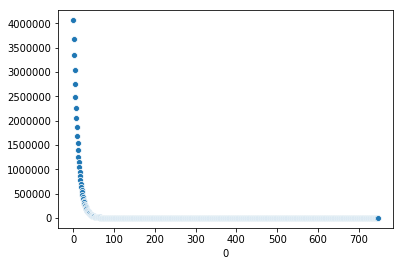

In [14]:
graph_rss_vs_iter(0.0025)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


No of iterations required 265


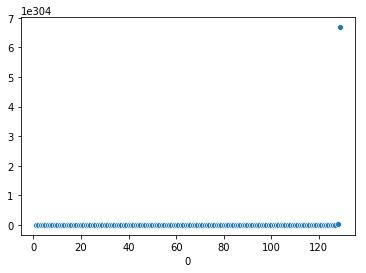

In [17]:
graph_rss_vs_iter(0.02)

Observe the change in number of iterations

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


No of iterations required 662


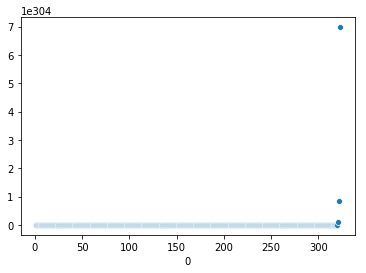

In [19]:
graph_rss_vs_iter(0.0050)

#### Moment of Weight 
- Plot of Weight vs iteration

In [61]:
def weight_vs_iterations(alpha):
    
    weight = np.array([[0],[0]])  
    delta = 1
    tol = 10**-4
    count = 0
    delta1 = []
    count1 = []
    weight1 = []
    # alpha control the size of the steps

    while np.sum(delta**2) > tol:

        delta = np.matmul(np.transpose(x),(y - np.matmul(x,weight)))
        weight = weight - (-2)*alpha*delta
        count += 1
        dlt=np.sum(delta**2)
        delta1.append(dlt)
        count1.append(count)
        weight1.append(weight)
        df = pd.DataFrame.from_records(weight1,columns = ['bo','b1'])
        plt.plot(count1,df)
    print("Number of iterations : ",count )


#### As we know, alpha controls the size of steps
#### Lets try with different alpha values varying from small to large and observe the change in number of iteration and the plot against Weight vs iterations

Number of iterations :  746


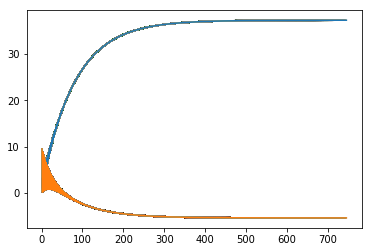

In [62]:
weight_vs_iterations(0.0025)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of iterations :  662


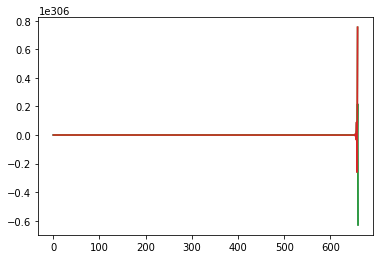

In [63]:
weight_vs_iterations(0.005)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of iterations :  473


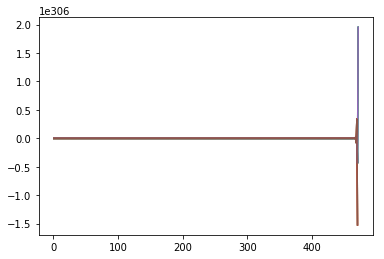

In [64]:
weight_vs_iterations(0.007)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in matmul
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of iterations :  265


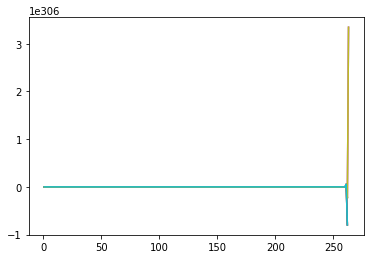

In [65]:
weight_vs_iterations(0.02)

Number of iterations :  1870


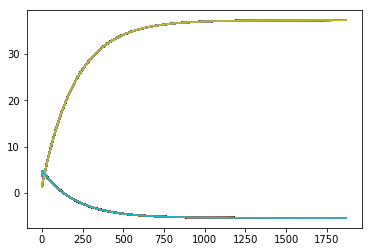

In [66]:
weight_vs_iterations(0.001)